### Import Python Libraries

In [1]:
import pandas as pd
import numpy as np

### Data Read

In [2]:
df = pd.read_csv("bumble.csv")

In [3]:
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,59946.0,32.340290,9.452779,18.0,26.0,30.0,37.0,110.0
height,59943.0,68.295281,3.994803,1.0,66.0,68.0,71.0,95.0
income,59946.0,20033.222534,97346.192104,-1.0,-1.0,-1.0,-1.0,1000000.0


In [5]:
df.describe(include = 'all')

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks
count,59946.000000,59946,59946,54650,35551,56961,53318,54266,59943.000000,59946.000000,51748,59946,59946,40025,39720,48890,59896
unique,NaN,5,2,12,18,6,32,217,NaN,NaN,21,30123,199,15,45,48,7647
top,NaN,single,m,average,mostly anything,socially,graduated from college/university,white,NaN,NaN,other,2012-06-29-22-56,"san francisco, california",likes dogs and likes cats,agnosticism,gemini and it&rsquo;s fun to think about,english
freq,NaN,55697,35829,14652,16585,41780,23959,32831,NaN,NaN,7589,24,31064,14814,2724,1782,21828
mean,32.340290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.295281,20033.222534,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,9.452779,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.994803,97346.192104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,30.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.000000,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(59946, 17)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   gender       59946 non-null  object 
 3   body_type    54650 non-null  object 
 4   diet         35551 non-null  object 
 5   drinks       56961 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59943 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  59946 non-null  object 
 12  location     59946 non-null  object 
 13  pets         40025 non-null  object 
 14  religion     39720 non-null  object 
 15  sign         48890 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.8+ MB


In [8]:
df.columns

Index(['age', 'status', 'gender', 'body_type', 'diet', 'drinks', 'education',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'pets', 'religion', 'sign', 'speaks'],
      dtype='object')

In [9]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ','_')

In [10]:
df.columns

Index(['age', 'status', 'gender', 'body_type', 'diet', 'drinks', 'education',
       'ethnicity', 'height', 'income', 'job', 'last_online', 'location',
       'pets', 'religion', 'sign', 'speaks'],
      dtype='object')

In [11]:
df.dtypes

age              int64
status          object
gender          object
body_type       object
diet            object
drinks          object
education       object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
pets            object
religion        object
sign            object
speaks          object
dtype: object

### Data Cleaning

In [12]:
missing_data = df.isnull().sum().sort_values(ascending = False)
missing_percent = (missing_data/len(df)) * 100

In [13]:
missing_summary = pd.DataFrame({
    'missing values' : missing_data,
    'missing percent' : missing_percent.round(2)
})
missing_summary

,missing values,missing percent
diet,24395,40.69
religion,20226,33.74
pets,19921,33.23
sign,11056,18.44
job,8198,13.68
education,6628,11.06
ethnicity,5680,9.48
body_type,5296,8.83
drinks,2985,4.98
speaks,50,0.08


In [14]:
# 1. Replace invalid income values
df['income'] = df['income'].replace(-1, np.nan)

# 2. Fill missing categorical columns
fill_values = {
    'body_type': 'unknown',
    'diet': 'not specified',
    'drinks': df['drinks'].mode()[0],
    'education': 'not specified',
    'pets': 'not mentioned',
    'religion': 'not mentioned',
    'sign': 'unknown',
    'speaks': 'not specified',
    'ethnicity' : 'not specified',
    'job' : 'not specified'
}
df.fillna(value=fill_values, inplace=True)

# 3. Impute numeric columns with group-based medians
df['height'] = df.groupby('gender')['height'].transform(lambda x: x.fillna(x.median()))
df['income'] = df.groupby('gender')['income'].transform(lambda x: x.fillna(x.median()))

In [15]:
# 4. Convert date
df['last_online'] = pd.to_datetime(df['last_online'], format="%Y-%m-%d-%H-%M", errors='coerce')
df.dtypes

age                     int64
status                 object
gender                 object
body_type              object
diet                   object
drinks                 object
education              object
ethnicity              object
height                float64
income                float64
job                    object
last_online    datetime64[ns]
location               object
pets                   object
religion               object
sign                   object
speaks                 object
dtype: object

In [16]:
df.isnull().sum()

age            0
status         0
gender         0
body_type      0
diet           0
drinks         0
education      0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
pets           0
religion       0
sign           0
speaks         0
dtype: int64

In [17]:
# Find the latest login date
latest_date = df['last_online'].max()

# Calculate how many days since each user was last online
df['days_since_online'] = (latest_date - df['last_online']).dt.days


In [18]:
def categorize_activity(days):
    if days <= 7:
        return 'Active last week'
    elif days <= 30:
        return 'Active last month'
    else:
        return 'Inactive'

df['activity_status'] = df['days_since_online'].apply(categorize_activity)


In [19]:
df.head(2)

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks,days_since_online,activity_status
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,60000.0,transportation,2012-06-28 20:30:00,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english,2,Active last week
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000.0,hospitality / travel,2012-06-29 21:41:00,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (...",1,Active last week


### Handle Outliers

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

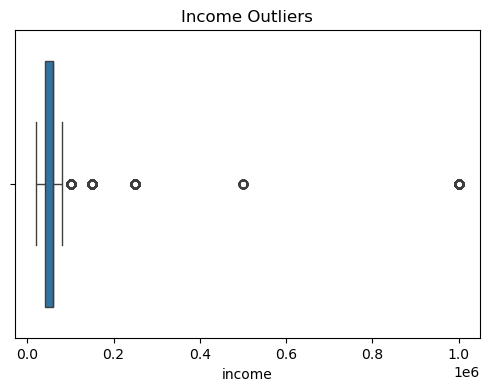

In [21]:
# Replace -1 in income with NaN
df['income'] = df['income'].replace(-1, np.nan)

# Visualize outliers
plt.figure(figsize=(6,4))
sns.boxplot(x=df['income'])
plt.title("Income Outliers")
plt.show()

# Remove extreme outliers beyond 99th percentile
df = df[df['income'] < df['income'].quantile(0.99)]


In [22]:
df['income'].describe()

count     59228.000000
mean      52427.061525
std       18094.053379
min       20000.000000
25%       40000.000000
50%       60000.000000
75%       60000.000000
max      150000.000000
Name: income, dtype: float64

In [23]:
df[df['income'] == -1]

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks,days_since_online,activity_status


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59228 entries, 0 to 59945
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   age                59228 non-null  int64         
 1   status             59228 non-null  object        
 2   gender             59228 non-null  object        
 3   body_type          59228 non-null  object        
 4   diet               59228 non-null  object        
 5   drinks             59228 non-null  object        
 6   education          59228 non-null  object        
 7   ethnicity          59228 non-null  object        
 8   height             59228 non-null  float64       
 9   income             59228 non-null  float64       
 10  job                59228 non-null  object        
 11  last_online        59228 non-null  datetime64[ns]
 12  location           59228 non-null  object        
 13  pets               59228 non-null  object        
 14  religion   

In [52]:
df1 = pd.read_csv('bumble.csv')

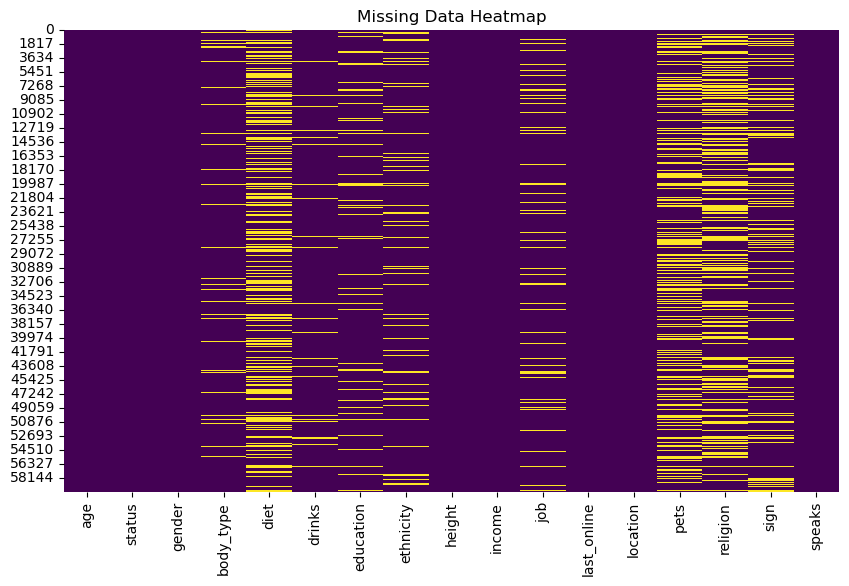

In [53]:
plt.figure(figsize=(10,6))
sns.heatmap(df1.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

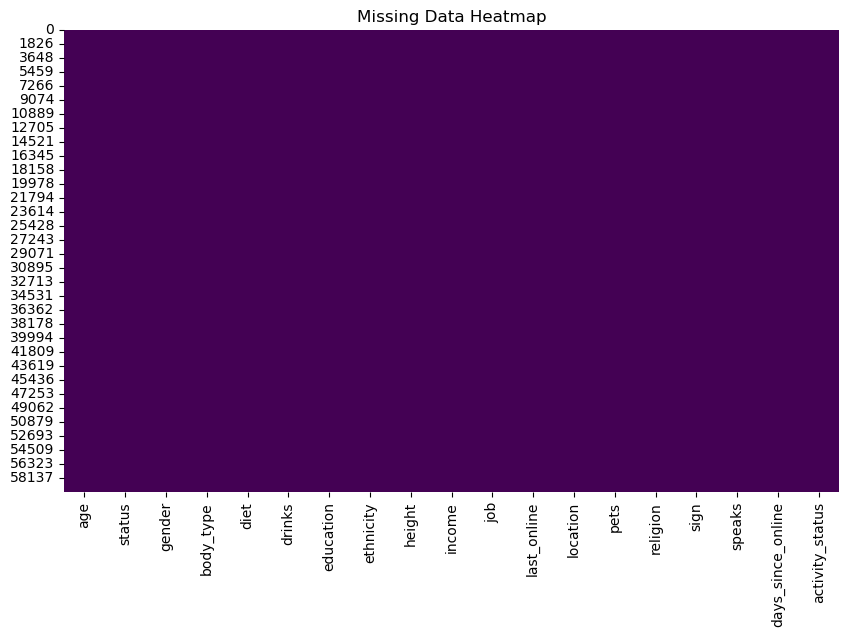

In [25]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Data Heatmap")
plt.show()

In [26]:
df['age']

0        22
1        35
2        38
3        23
4        29
         ..
59941    59
59942    24
59943    42
59944    27
59945    39
Name: age, Length: 59228, dtype: int64

In [27]:
min(df['age'])

18

In [28]:
max(df['age'])

110

In [36]:
# Age bins
bins = [18, 25, 35, 45, 120]
labels = ['18-25', '26-35', '36-45', '46+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels,include_lowest=True )

In [37]:
# Income bins
df['income_group'] = pd.qcut(df['income'], q=3, labels=['Low', 'Medium', 'High'])

In [38]:
df.isnull().sum()

age                     0
status                  0
gender                  0
body_type               0
diet                    0
drinks                  0
education               0
ethnicity               0
height                  0
income                  0
job                     0
last_online             0
location                0
pets                    0
religion                0
sign                    0
speaks                  0
days_since_online       0
activity_status         0
age_group               0
income_group            0
profile_completeness    0
dtype: int64

In [42]:
df['height_cm'] = df['height'] * 2.54

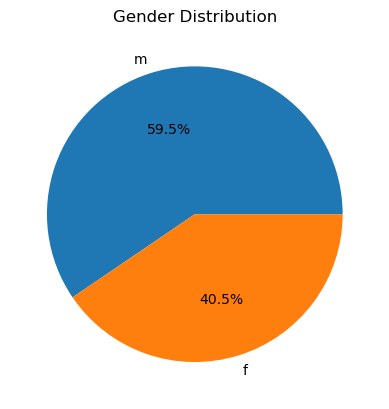

In [43]:
# Gender distribution
gender_dist = df['gender'].value_counts(normalize=True) * 100
plt.pie(gender_dist, labels=gender_dist.index, autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()


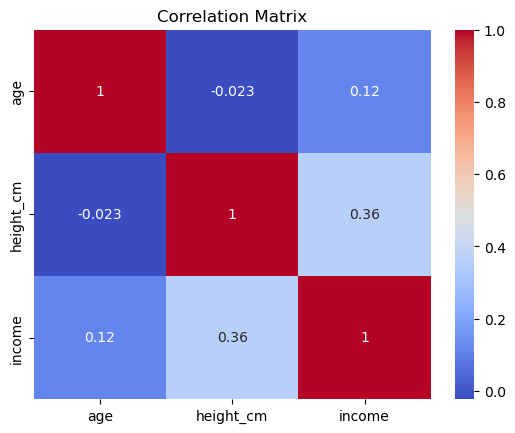

In [44]:
numeric_cols = ['age', 'height_cm', 'income']
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


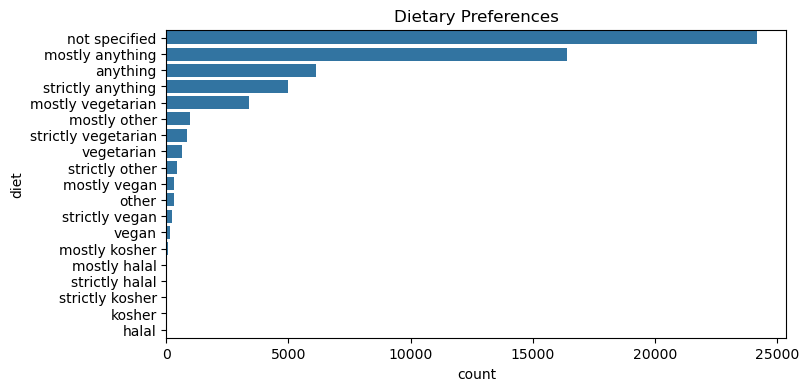

In [45]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, y='diet', order=df['diet'].value_counts().index)
plt.title("Dietary Preferences")
plt.show()


In [49]:
# 1. Split safely
location_split = df['location'].str.split(',', n=1, expand=True)

# 2. Assign
df['city'] = location_split[0].str.strip()
df['state'] = location_split[1].str.strip()

# 3. Handle missing states
df['state'] = df['state'].fillna('Unknown')

# 4. Get top 5 cities
top_cities = df['city'].value_counts().head(5)
print(top_cities)


city
san francisco    30660
oakland           7110
berkeley          4166
san mateo         1313
palo alto         1055
Name: count, dtype: int64


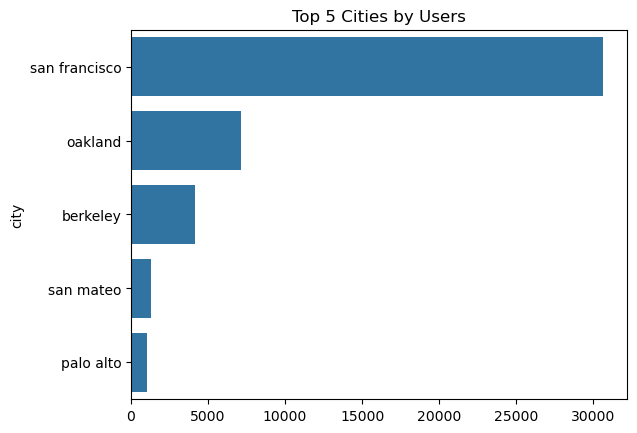

In [50]:
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 5 Cities by Users")
plt.show()


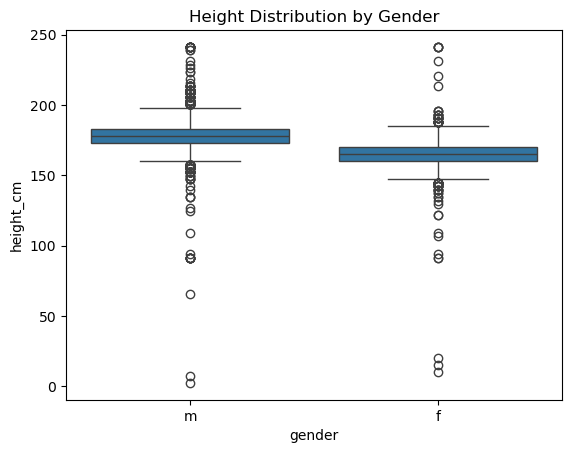

In [51]:
sns.boxplot(data=df, x='gender', y='height_cm')
plt.title("Height Distribution by Gender")
plt.show()

b) By Age Group

C:\Users\prati\AppData\Local\Temp\ipykernel_22652\1689713405.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='age_group', y='profile_completeness', palette='coolwarm')


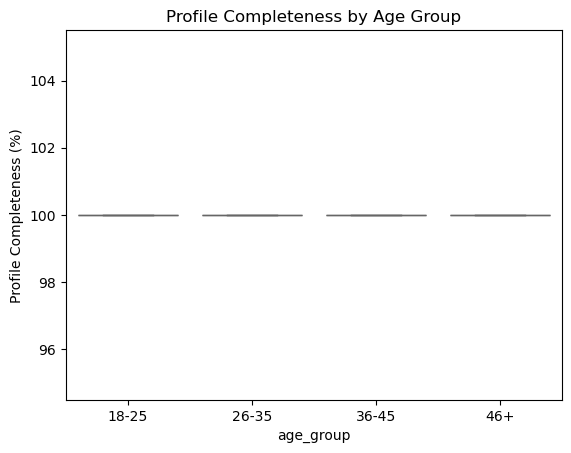

In [55]:
sns.boxplot(data=df, x='age_group', y='profile_completeness', palette='coolwarm')
plt.title("Profile Completeness by Age Group")
plt.ylabel("Profile Completeness (%)")
plt.show()